In [1]:
import cPickle
import numpy as np
import mxnet as mx
import matplotlib.pyplot as plt
import PIL.Image as Image

In [2]:
color = (np.random.randint(0, 255), np.random.randint(0, 255), np.random.randint(0, 255))

In [3]:
data_file = '/mnt/truenas/scratch/siyu/keypoint_maskrcnn/debug/onesample/data0.pkl'
label_file = '/mnt/truenas/scratch/siyu/keypoint_maskrcnn/debug/onesample/label0.pkl'
data = cPickle.load(open(data_file, 'r'))
label = cPickle.load(open(label_file, 'r'))

In [4]:
im = data[0].asnumpy()[0]
im = im.transpose((1,2,0))
im = im.astype(np.uint8)

In [5]:
im.shape

(800, 1333, 3)

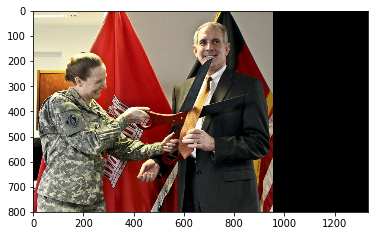

In [6]:
plt.imshow(im)

In [7]:
roi1 = data[1].asnumpy()[0][:,1:]
roi2 = data[2].asnumpy()[0][:,1:]
roi3 = data[3].asnumpy()[0][:,1:]
roi4 = data[4].asnumpy()[0][:,1:]
roi = roi1 + roi2 + roi3 + roi4
print roi.shape

(256, 4)


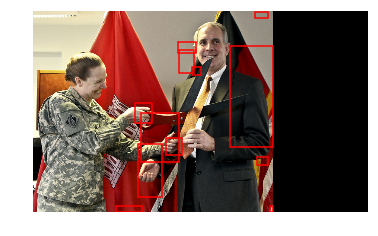

In [25]:
plt.imshow(im)

for i in range(18,30):
    bbox = roi[i]
    linewidth = 1.5
    color = 'r'
    bbox = roi[i]
    rect = plt.Rectangle((bbox[0], bbox[1]),
                         bbox[2] - bbox[0],
                         bbox[3] - bbox[1], fill=False,
                         edgecolor=color, linewidth=linewidth)
    plt.gca().add_patch(rect)

plt.axis('off')
plt.show()

In [9]:
keypoints = label[3].asnumpy()[0]
print keypoints.shape

(64, 17)


In [10]:
def decode_kp(kp_label, bbox):
    if kp_label == -1:
        return 0, 0
    x = int(kp_label) % 56
    y = int(kp_label) / 56
    
    x = bbox[0] + float(x) / 56.0 * (bbox[2] - bbox[0])
    y = bbox[1] + float(y) / 56.0 * (bbox[3] - bbox[1])
    return x, y

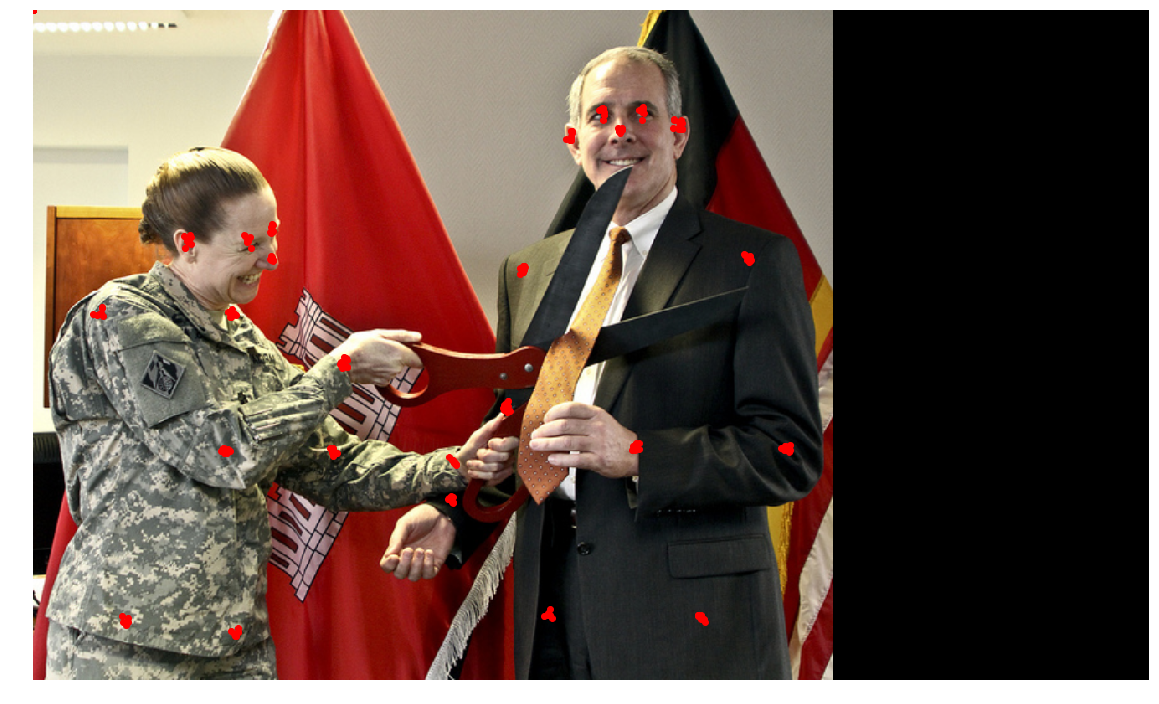

In [28]:
plt.figure(figsize=(20,30))
plt.imshow(im)
# im[:,::-1,:]
# ind = 26
for i in range(64):
    bbox = roi[i]
#     print bbox
    keypoint = keypoints[i]
#     print keypoint
    xs = np.zeros(17)
    ys = np.zeros(17)
    for k, kp in enumerate(keypoint):
        xs[k], ys[k] = decode_kp(kp, bbox)
#     print xs, ys
    plt.plot(xs, ys, 'ro')
        

plt.axis('off')
plt.show()

In [17]:
keypoints[0:50]

array([[ 6.990e+02,  5.310e+02,  5.840e+02, -1.000e+00,  5.770e+02,
         1.030e+03,  9.590e+02,  1.826e+03,  1.813e+03,  1.896e+03,
         1.323e+03,  2.878e+03,  2.810e+03, -1.000e+00, -1.000e+00,
        -1.000e+00, -1.000e+00],
       [ 4.780e+02,  3.690e+02,  3.640e+02,  4.290e+02,  4.720e+02,
         1.110e+03,  1.138e+03,  2.067e+03,  1.808e+03,  2.048e+03,
         2.305e+03,  2.896e+03,  2.877e+03, -1.000e+00, -1.000e+00,
        -1.000e+00, -1.000e+00],
       [ 6.990e+02,  5.310e+02,  5.840e+02, -1.000e+00,  5.770e+02,
         1.030e+03,  9.590e+02,  1.826e+03,  1.813e+03,  1.896e+03,
         1.323e+03,  2.879e+03,  2.810e+03, -1.000e+00, -1.000e+00,
        -1.000e+00, -1.000e+00],
       [ 4.780e+02,  3.690e+02,  3.640e+02,  4.290e+02,  4.720e+02,
         1.110e+03,  1.138e+03,  2.067e+03,  1.808e+03,  2.048e+03,
         2.305e+03,  2.896e+03,  2.877e+03, -1.000e+00, -1.000e+00,
        -1.000e+00, -1.000e+00],
       [ 7.080e+02,  5.980e+02,  5.940e+02,  7.130e+

In [23]:
label[0].sum()


[18.]
<NDArray 1 @cpu(0)>

In [24]:
roi[0:18]

array([[ 1.07462873e+01,  1.61402985e+02,  5.82641785e+02,
         7.98507446e+02],
       [ 4.16208923e+02,  3.59552231e+01,  9.44746277e+02,
         7.89208984e+02],
       [ 1.00474720e+01,  1.61162079e+02,  5.81527527e+02,
         7.99000000e+02],
       [ 4.15470459e+02,  3.65621948e+01,  9.44892456e+02,
         7.89453064e+02],
       [ 2.66278076e+02,  0.00000000e+00,  9.45400269e+02,
         6.52825439e+02],
       [ 4.64675568e+02,  4.21447449e+01,  8.46277466e+02,
         6.59597778e+02],
       [ 1.04707573e+02,  1.88234863e+02,  4.06761902e+02,
         7.99000000e+02],
       [ 5.01543762e+02,  8.23940430e+01,  8.61502502e+02,
         7.99000000e+02],
       [ 4.29280823e+02,  0.00000000e+00,  8.26174377e+02,
         6.57119873e+02],
       [-2.68690825e-01,  1.91444061e+02,  7.94416138e+02,
         7.89955078e+02],
       [ 2.65517700e+02,  2.65278076e+02,  9.53731323e+02,
         7.99000000e+02],
       [ 1.06814445e+02,  3.16574615e+02,  6.47433533e+02,
      

In [275]:
bbox_target = data[1].asnumpy()[0]

In [277]:
bbox_target[100:200]

array([[  0.       ,   0.       ,   0.       ,   0.       ,   0.       ],
       [  0.       ,   0.       ,   0.       ,   0.       ,   0.       ],
       [  0.       ,   0.       ,   0.       ,   0.       ,   0.       ],
       [  0.       ,   0.       ,   0.       ,   0.       ,   0.       ],
       [  0.       ,   0.       ,   0.       ,   0.       ,   0.       ],
       [  0.       ,   0.       ,   0.       ,   0.       ,   0.       ],
       [  0.       ,   0.       ,   0.       ,   0.       ,   0.       ],
       [  0.       ,   0.       ,   0.       ,   0.       ,   0.       ],
       [  0.       ,  -1.6822796, 235.55911  , 495.00177  , 799.       ],
       [  0.       ,   0.       ,   0.       ,   0.       ,   0.       ],
       [  0.       ,   0.       ,   0.       ,   0.       ,   0.       ],
       [  0.       ,   0.       ,   0.       ,   0.       ,   0.       ],
       [  0.       ,   0.       ,   0.       ,   0.       ,   0.       ],
       [  0.       ,   0.       ,   0.